In [2]:
# import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
# read in csv as dataframe
df = pd.read_csv('https://mydataclassdb-bucket.s3.amazonaws.com/covid_and_politics_db.csv')
df.head()

,county,state,county_state,lat,long,totalpop,total_votes20,votes20_donald_trump,votes20_joe_biden,percentage20_donald_trump,...,age_55to64,age_65to74,age_75to84,age_84plus,evangelicals,protestant,catholic,orthodox,muslim,other
0,Kay,OK,"Kay, OK",36.817997,-97.144214,45173,17249,12834,4040,0.744,...,5694,4632,2724,1183,0,0,0,0,0,0
1,Abbeville,SC,"Abbeville, SC",34.223334,-82.461707,24788,12433,8215,4101,0.661,...,3584,3150,1602,591,0,0,0,0,0,0
2,Acadia,LA,"Acadia, LA",30.295065,-92.414197,62607,28425,22596,5443,0.795,...,0,0,0,0,0,0,0,0,0,0
3,Accomack,VA,"Accomack, VA",37.767072,-75.632346,32840,16938,9172,7578,0.542,...,5270,4451,2301,886,0,0,0,0,0,0
4,Ada,ID,"Ada, ID",43.452658,-116.241552,435117,259389,130699,120539,0.504,...,56615,42027,18576,7189,0,0,0,0,0,0


In [6]:
# drop rows with null values and check if there are any nulls in columns after
df = df.dropna(axis = 0, how = 'any')
df.isnull().sum()

county          0
state           0
county_state    0
lat             0
long            0
               ..
protestant      0
catholic        0
orthodox        0
muslim          0
other           0
Length: 61, dtype: int64

In [12]:
# normalize cases by dividing into each counties total population
df['normalized_cases'] = county_df['cases']/county_df['totalpop']
df['normalized_cases'].head()

0    0.020366
1    0.032475
2    0.050825
3    0.037363
4    0.040106
Name: normalized_cases, dtype: float64

In [13]:
# normalize deaths by dividing into each counties total population
df['normalized_deaths'] = county_df['deaths']/county_df['totalpop']
df['normalized_deaths'].head()

0    0.000354
1    0.000686
2    0.001629
3    0.000579
4    0.000416
Name: normalized_deaths, dtype: float64

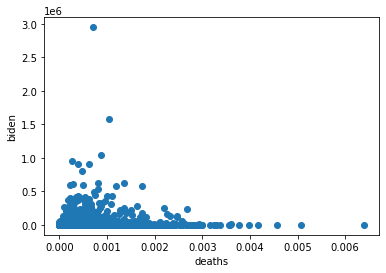

In [14]:
# identify relationships
plt.scatter(df.normalized_deaths, df.votes20_joe_biden)
plt.xlabel('deaths')
plt.ylabel('biden')
plt.show()

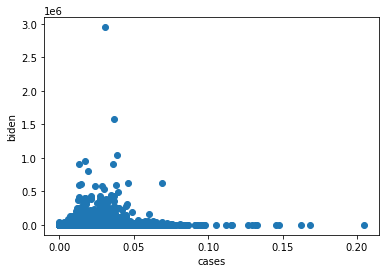

In [16]:
# identify relationships
plt.scatter(df.normalized_cases, df.votes20_joe_biden)
plt.xlabel('cases')
plt.ylabel('biden')
plt.show()

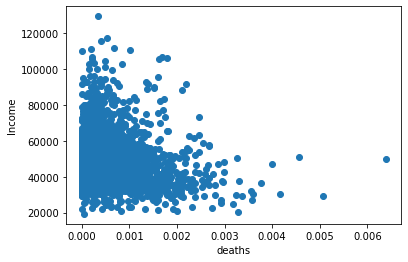

In [17]:
# identify relationships
plt.scatter(df.normalized_deaths, df.income)
plt.xlabel('deaths')
plt.ylabel('Income')
plt.show()

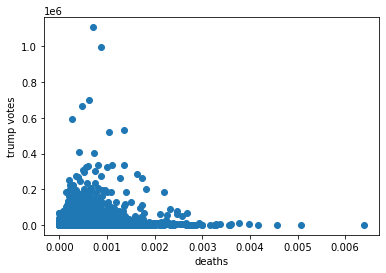

In [18]:
# identify relationships
plt.scatter(df.normalized_deaths, df.votes20_donald_trump)
plt.xlabel('deaths')
plt.ylabel('trump votes')
plt.show()

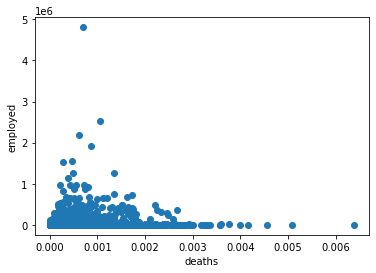

In [19]:
# identify relationships
plt.scatter(df.normalized_deaths, df.employed)
plt.xlabel('deaths')
plt.ylabel('employed')
plt.show()

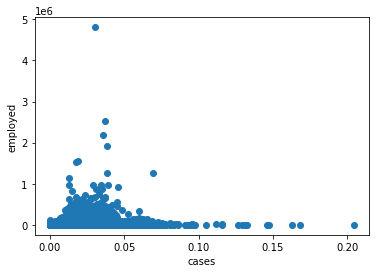

In [20]:
# identify relationships
plt.scatter(df.normalized_cases, df.employed)
plt.xlabel('cases')
plt.ylabel('employed')
plt.show()

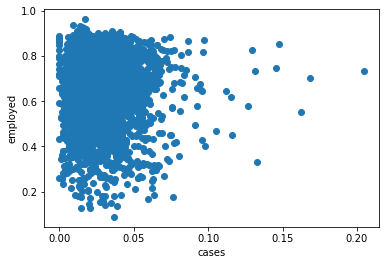

In [21]:
# identify relationships
plt.scatter(df.normalized_cases, df.percentage20_donald_trump)
plt.xlabel('cases')
plt.ylabel('employed')
plt.show()

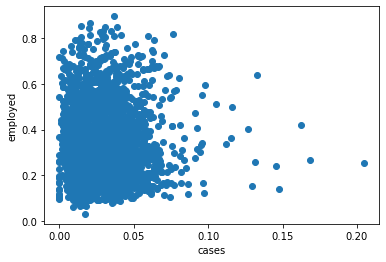

In [22]:
# identify relationships
plt.scatter(df.normalized_cases, df.percentage20_joe_biden)
plt.xlabel('cases')
plt.ylabel('employed')
plt.show()

In [ ]:
## Because the normalized cases and votes is a percentage and because percentage of votes per county
## is also a percentage, this is our best bet for the regression model.
## Although there is not a definite linear relationship, insights can still be drawn.